# Naive Bayes

## Write your id numbers and names here


1.   List item
2.   List item


## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we used before.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```
to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)


### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 
Describe in text (preferably math notationns) the classification rule, and explain.

**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
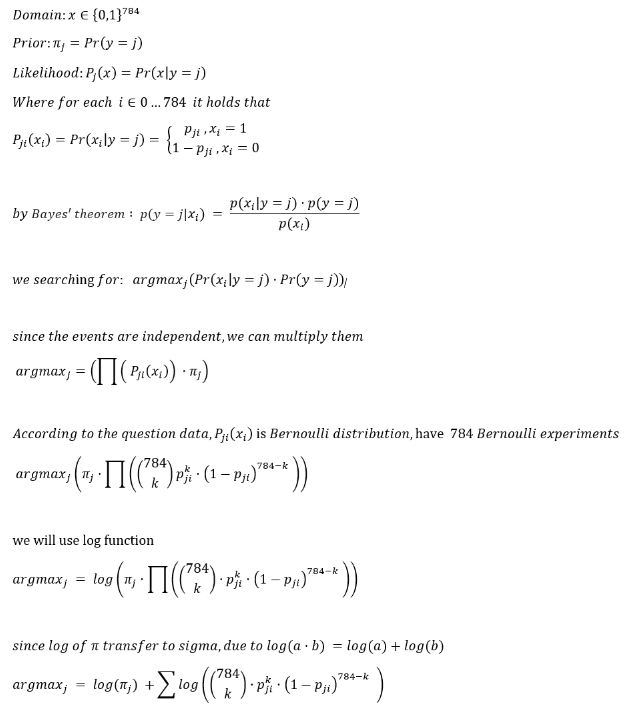

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
**Exercise 1:**

In [2]:
import sklearn
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [3]:
binarize_x_train = sklearn.preprocessing.binarize(x_train, threshold=0.0, copy=True)
binarize_x_test = sklearn.preprocessing.binarize(x_test, threshold=0.0, copy=True)
Bernoulli_classifier = BernoulliNB()
Bernoulli_classifier.fit(binarize_x_train, y_train)

BernoulliNB()

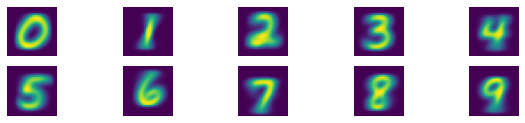

In [23]:
#Take feature_log_prob_ which is (by documentation) - Empirical log probability of features given a class, P(x_i|y)
#Which is an image when each cell is the probability that this cell has color in our case, that's how we can genarate sample from each class. 
plt.figure(figsize=(10, 2))
for i in range(10):
    img=np.exp(Bernoulli_classifier.feature_log_prob_[i])
    plt.subplot(2, 5, i+1)
    plt.imshow(img.reshape((28,28))) 
    plt.axis('off')

**Exercise 2:**

In [5]:
y_pred = Bernoulli_classifier.predict(binarize_x_test)
print(confusion_matrix(y_test, y_pred))

[[ 887    0    4    7    2   41   16    1   22    0]
 [   0 1085   10    5    0    9    6    0   19    1]
 [  19    8  852   29   17    4   32   14   55    2]
 [   5   15   34  844    0   13    9   15   49   26]
 [   2    6    4    0  795    4   21    1   23  126]
 [  23   12    7  129   30  627   16    8   21   19]
 [  18   18   15    2   13   35  851    0    6    0]
 [   1   24   14    4   15    0    0  871   27   72]
 [  16   23   13   76   17   22    7    6  758   36]
 [   9   13    5    9   74    8    0   24   24  843]]


In [6]:
print('Our accuracy score:', accuracy_score(y_test, y_pred))

Our accuracy score: 0.8413


## Summarizing the results: </br>
accuracy score is calculate by - (TP+TN)/samples quantity </br>
which means - how much the model gives correct prediction, devided by sum of predictions.</br> **In other words - the probability to predict correctly**

**Exercise 3:** <br/>
Tuning to the hyper-parameters - <br/>
In order to find the optimize threshold we will do tuning, We will make iterations of training and testing the model, while we change the threshold parameter. We can also define a function for the threshold where it's minimum value will be our optimom, and perform gradient descent. 


Moreover, at section 1,2 , we used one global value as a threshold equal to zero. We noticed that having the same threshold might not be good in all cases. That can happened due to an image which has different lighting conditions in different areas.

We would suggest an algorithm that will determine the threshold for a pixel based on a small region around it. As a result, this will generate different thresholds for different regions of the same image which gives better results for images with varying illumination.


</br>
After searching a bit we found out it can be done by :

*   adaptive mean threshold: mean of the neighbourhood area minus the constant C.

*   adaptive gaussian threshold: gaussian-weighted sum of the neighbourhood values minus the constant C.




## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### You task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).


In [7]:
#import libaries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from sklearn.pipeline import Pipeline


In [8]:
#get data from fetch_20newsgroups
x_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes')).data
y_train = fetch_20newsgroups(subset='train').target
x_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes')).data
y_test = fetch_20newsgroups(subset='test').target

In [9]:
#our MNB class: 
class MultinomialNaiveBayes:
    
    def __init__(self):
        self.classes = None
        self.dict_log_pie = {}
        self.dict_log_prob_term_class = {}
    def fit(self,x,y):
      #compute:
      #*.how many documents in the corpus (=corpus_len)
      #*.for each class in the corpus - how many instances of this class exists (=class_repetition).
      #*.for each class and word in the corpus - how many times this words appear (in this class) (=class_terms_dic).
      #*.for each class in the corpus - how many words exists (=class_sum_of_words_dic).
      #*. dict_log_prob_term_class - p(term|class)
      class_repetition = {}
      class_terms_dic = {}
      class_sum_of_words_dic = {}
      corpus_len = len(x)
      self.classes = np.unique(y)
      self.classes = np.sort(self.classes)

      for i in self.classes: #initiate class_repetition, class_terms_dic, class_sum_of_words_dic
          class_repetition[i] = 0
          class_terms_dic[i] = np.zeros(x.shape[1])
          class_sum_of_words_dic[i] = 0

      for clas in y: #caculate class_repetition
          class_repetition[clas] += 1
        
      #caculate -  class_terms_dic, class_sum_of_words_dic
      for row in range(x.shape[0]): #go over the rows
        truth_class = y_train[row]
        class_terms_dic[truth_class] += np.array(x[row])
        class_sum_of_words_dic[truth_class] += np.sum(np.array(x[row]))

      #caculate class_repetition - dict_log_pie
      for clas in self.classes:
          self.dict_log_pie[clas] = np.log(class_repetition[clas]) - np.log(corpus_len)

      #caculate dict_log_prob_term_class - p(term|class)
      for term in range(x.shape[1]):
        for clas in self.classes:
            if term not in self.dict_log_prob_term_class:
              self.dict_log_prob_term_class[term] = np.zeros(len(self.classes))
            self.dict_log_prob_term_class[term][clas] = np.log(class_terms_dic[clas][term]+1)-np.log(class_sum_of_words_dic[clas]+x.shape[1])


    
    def predict_log_prob(self, x):
  #go over the docs, find p(class) for each document, calculated by log(pie) + tf * log(p(term|class)) 
  #which caculated by the variables - log_pie (from fit), x[doc_ind][term] (from CountVectorizer) dict_log_prob_term_class (from fit)
  #input - x_test. output - log-probability estimates for the test vector X.
      res_arr = np.zeros((x.shape[0], len(self.classes)))
      
      for doc_ind in range(x.shape[0]):
        prob_for_doc = np.zeros(len(self.classes))
        for clas in self.classes:
          log_pie = self.dict_log_pie[clas]
          log_probability_for_class = 0
          for term in range(x.shape[1]):
            tf = x[doc_ind][term]
            if tf==0:
              continue
            p_term_given_class = self.dict_log_prob_term_class[term][clas]
            log_probability_for_class += tf*p_term_given_class
          prob_for_doc[clas] = np.add(log_pie,log_probability_for_class)
        res_arr[doc_ind] = prob_for_doc
      return res_arr

    def predict(self, x):
    #Perform classification on an array of test vectors X
    #input test vectors X, output - classification results.
        pred_arr = np.array([])
        iter = self.predict_log_prob(x)
        for prob_arr in iter:
          pred_arr = np.append(pred_arr, np.argmax(prob_arr))
        return pred_arr
    


In [10]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

#Implement function to find the score
def score_for_my_model(y_pred,y_ground_truth):
    hit = 0
    for i in range(len(y_pred)):
        hit = hit+1 if y_pred[i] == y_ground_truth[i] else hit
    hit_rate = hit/len(y_pred)
    return hit_rate

# CountVectorizer:

In [11]:
#our classifier
pipe = Pipeline(steps=[("vect", CountVectorizer(stop_words='english', max_features=500)),('MNB', MultinomialNaiveBayes())])
count_vectorizer_x_train = pipe.named_steps["vect"].fit_transform(x_train).toarray()
x_train_vocab = pipe.named_steps["vect"].vocabulary_
pipe.named_steps["MNB"].fit(count_vectorizer_x_train, y_train)

#count_vectorizer_x_test has to set the vocabulary of the train set so we are using another CountVectorizer()
count_vectorizer_x_test = CountVectorizer(stop_words='english', vocabulary=x_train_vocab).fit_transform(x_test).toarray()

#Apply our model and the score function of it.
Y_test_pred_ours = pipe.named_steps["MNB"].predict(count_vectorizer_x_test)

our_score_test = score_for_my_model(Y_test_pred_ours,y_test) 
print("Our score on testing data :",our_score_test)
print("Classification report for testing data :-")
print(classification_report(y_test, Y_test_pred_ours))

Our score on testing data : 0.39378651088688266
Classification report for testing data :-
              precision    recall  f1-score   support

           0       0.25      0.37      0.30       319
           1       0.40      0.50      0.44       389
           2       0.00      0.00      0.00       394
           3       0.37      0.45      0.41       392
           4       0.45      0.44      0.45       385
           5       0.56      0.50      0.53       395
           6       0.67      0.58      0.62       390
           7       0.39      0.44      0.42       396
           8       0.31      0.45      0.37       398
           9       0.40      0.54      0.46       397
          10       0.24      0.31      0.27       399
          11       0.68      0.45      0.54       396
          12       0.29      0.38      0.33       393
          13       0.30      0.28      0.29       396
          14       0.56      0.34      0.42       394
          15       0.44      0.51      0.47  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
#sklearn model:
# Using sklearn's Multinomial Naive Bayes
#we have the data after preproccesing in the block before, so we dont need to make one more pipline
sklearn_cls = MultinomialNB()
sklearn_cls.fit(count_vectorizer_x_train,y_train)
Y_test_pred = sklearn_cls.predict(count_vectorizer_x_test)
sklearn_score_train = sklearn_cls.score(count_vectorizer_x_test,y_test)
print("Sklearn's score on training data :",sklearn_score_train)
print("Classification report for testing data :-")
print(classification_report(y_test, Y_test_pred))




Sklearn's score on training data : 0.39378651088688266
Classification report for testing data :-
              precision    recall  f1-score   support

           0       0.25      0.37      0.30       319
           1       0.40      0.50      0.44       389
           2       0.00      0.00      0.00       394
           3       0.37      0.45      0.41       392
           4       0.45      0.44      0.45       385
           5       0.56      0.50      0.53       395
           6       0.67      0.58      0.62       390
           7       0.39      0.44      0.42       396
           8       0.31      0.45      0.37       398
           9       0.40      0.54      0.46       397
          10       0.24      0.31      0.27       399
          11       0.68      0.45      0.54       396
          12       0.29      0.38      0.33       393
          13       0.30      0.28      0.29       396
          14       0.56      0.34      0.42       394
          15       0.44      0.51     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#TfidfVectorizer:


In [13]:
#our classifier
pipe = Pipeline(steps=[("Tfidf", TfidfVectorizer(stop_words='english', max_features=500)),('MNB', MultinomialNaiveBayes())])
Tfidf_x_train = pipe.named_steps["Tfidf"].fit_transform(x_train).toarray()
x_train_vocab = pipe.named_steps["Tfidf"].vocabulary_
pipe.named_steps["MNB"].fit(Tfidf_x_train, y_train)

#Tfidf_x_test has to set the vocabulary of the train set so we are using another TfidfVectorizer()
Tfidf_x_test = TfidfVectorizer(stop_words='english', vocabulary=x_train_vocab).fit_transform(x_test).toarray()

#Apply our model and the score function of it.
Y_test_pred_ours = pipe.named_steps["MNB"].predict(Tfidf_x_test)

our_score_test = score_for_my_model(Y_test_pred_ours,y_test) 
print("Our score on testing data :",our_score_test)
print("Classification report for testing data :-")
print(classification_report(y_test, Y_test_pred_ours))

Our score on testing data : 0.45884227296866703
Classification report for testing data :-
              precision    recall  f1-score   support

           0       0.29      0.29      0.29       319
           1       0.46      0.49      0.47       389
           2       0.52      0.53      0.53       394
           3       0.45      0.45      0.45       392
           4       0.53      0.44      0.48       385
           5       0.60      0.57      0.58       395
           6       0.59      0.65      0.62       390
           7       0.48      0.44      0.46       396
           8       0.43      0.43      0.43       398
           9       0.44      0.41      0.42       397
          10       0.34      0.63      0.44       399
          11       0.63      0.54      0.58       396
          12       0.34      0.29      0.31       393
          13       0.34      0.48      0.40       396
          14       0.55      0.42      0.47       394
          15       0.45      0.70      0.54  

In [14]:
#sklearn model:
# Using sklearn's Multinomial Naive Bayes
#we have the data after preproccesing in the block before, so we dont need to make one more pipline
sklearn_cls = MultinomialNB()
sklearn_cls.fit(Tfidf_x_train,y_train)
Y_test_pred = sklearn_cls.predict(Tfidf_x_test)
sklearn_score_train = sklearn_cls.score(Tfidf_x_test,y_test)
print("Sklearn's score on training data :",sklearn_score_train)
print("Classification report for testing data :-")
print(classification_report(y_test, Y_test_pred))


Sklearn's score on training data : 0.45884227296866703
Classification report for testing data :-
              precision    recall  f1-score   support

           0       0.29      0.29      0.29       319
           1       0.46      0.49      0.47       389
           2       0.52      0.53      0.53       394
           3       0.45      0.45      0.45       392
           4       0.53      0.44      0.48       385
           5       0.60      0.57      0.58       395
           6       0.59      0.65      0.62       390
           7       0.48      0.44      0.46       396
           8       0.43      0.43      0.43       398
           9       0.44      0.41      0.42       397
          10       0.34      0.63      0.44       399
          11       0.63      0.54      0.58       396
          12       0.34      0.29      0.31       393
          13       0.34      0.48      0.40       396
          14       0.55      0.42      0.47       394
          15       0.45      0.70     

#**The difference between our performance and sklearn seems to converge to zero**

In [15]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


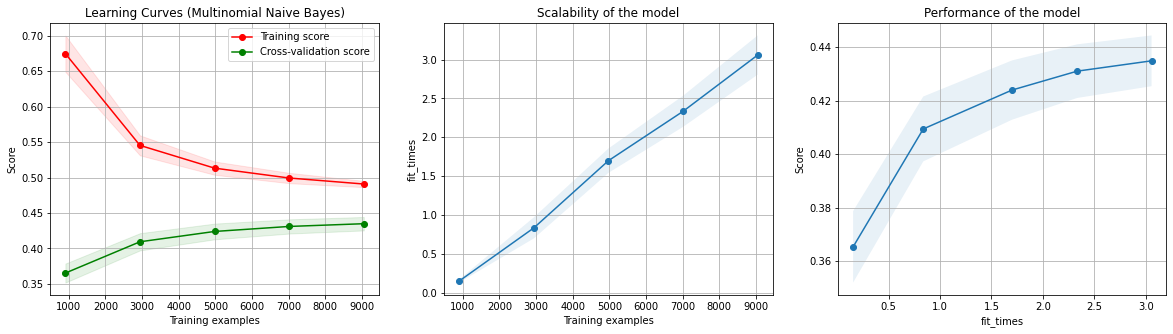

In [16]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



X, y = load_digits(return_X_y=True)

title = "Learning Curves (Multinomial Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator= MultinomialNB()
X=count_vectorizer_x_train
y=y_train
plot_learning_curve(
    estimator, title, X, y, ylim=None, cv=cv, n_jobs=4
)


plt.show()


### Bonus I (5 points)
#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

In [17]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


*# Implementationn for 1st bonus :*

In order to find the most important features, we will implement the function "def calc_p_c_given_xi(model)", gets the posterios. Then, given samples and truth labels, we can find the most important features by - <br/>
**for each error, class predict c^, truth class c,  (and set of features). Go over this set of features and compute the diffrence between the posterior of the ground truth and the predict and sum it for each feature, iterate all over the errors . The most important features are features who has the highest absolut values. Explanation - given error, class predict c^, truth class c, and feature x_i. If the posterior of x_i for c is bigger then the posterior of x_i for c^, we can say that x_i support c, else if it's the opposite. So if feature has the highest sum in our calculation, it is the feature who has the greatest soppurt in the truth values (of our errors), and the feature who has the minus highest value, is the feature who has the greates soppurt in this mistakes.** <br/>


In [18]:
def calc_p_c_given_xi(model, x, y):
#input - model. output - matrix of posterios (named p_xi_c)

  # for caculating p(c|xi) we need - p(c), p(x_i|c), p(x_i)
  # p(c) = exponent of model.class_log_prior_  :
  p_c = np.exp(model.class_log_prior_) #len = 20 
  # p(x_i|c) = exponent of model.feature_log_prob_ :
  p_xi_c = np.exp(model.feature_log_prob_) #shape = 20,max_features
  # compute - p(x_i) : matrix of p(x_i) for each class named - p_xi_c 
  # p(x_i) = sum of column x_i in doc-term matrix (caculated with CountVectorizer) divide by sum of terms in the corpus
  sum_columns_arr = np.array([np.sum(x) for x in zip(*x)])
  p_x_arr = np.array([np.divide(x,np.sum(sum_columns_arr)) for x in sum_columns_arr]) #len = max_features

  for clas in range(p_xi_c.shape[0]):
    p_xi_c[clas] = np.multiply(p_xi_c[clas], p_c[clas])
    for feature in range(p_xi_c.shape[1]):
      p_xi_c[clas][feature] = np.divide(p_xi_c[clas][feature], p_x_arr[feature])
  
  return p_xi_c

In [19]:
p_xi_c = calc_p_c_given_xi(model=sklearn_cls, x=count_vectorizer_x_train, y=y_train)
y_pred = sklearn_cls.predict(count_vectorizer_x_train)

In [20]:
#calculate dict_features - dictionary where summing the diffrence bretween posterior of c^ and c for each feature in errors. 
dict_features = {}
for pred in range(len(y_pred)):
  if y_pred[pred] != y_train[pred]: #for each error
    c_estimate = y_pred[pred] #get c^
    c_truth = y_train[pred] #get c
    for feature in range(p_xi_c.shape[1]): #sum for each feature - the posterior for truth minus esimate.
      sub_prob = p_xi_c[c_truth][feature]-p_xi_c[c_estimate][feature]
      dict_features[feature] = dict_features[feature] + sub_prob if feature in dict_features else sub_prob

In [21]:
#get the top 20 maxium absolute values, the positive values soppurt the correct class,  the negative soppurt the mistake.
#sort by abs value, then take the first 20
index_most_important_features = list(sorted(dict_features.items(), key=lambda x:abs(x[1]), reverse = True))[:20]

In [22]:
#invert vocabulary dictionary :
our_vocabulary = dict(map(lambda t: (t[1],t[0]), x_train_vocab.items()))
#get the words
soppurt_correct_class = [our_vocabulary[ind] for ind, val in index_most_important_features if val>0] #bassicly, if val=0 It's not soppurt anyone more then the other.
soppurt_uncorrect_class = [our_vocabulary[ind] for ind, val in index_most_important_features if val<0]
#apply Nadav's coloring function :
only_soppurt_unsoppurt_txt = "words soppurts correct class : " + " ".join(soppurt_correct_class) + \
  " \r\n" + "words soppurts wrong class : " + " ".join(soppurt_uncorrect_class)
print_txt(txt=only_soppurt_unsoppurt_txt, hot=soppurt_correct_class, cold=soppurt_uncorrect_class)


words soppurts correct class : israeli israel clipper apple nasa space monitor 
words soppurts wrong class : hockey players season team game play league games win period points vs bike


### Bonus II (5 points)
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

**Answer for 2nd bonus**

-
####**As the articale mentioned**

”””
##Local Gradient Explanation Vector
This method (Baehrens, et al. 2010) is able to explain the local decision taken by arbitrary nonlinear classification algorithms, using the local gradients that characterize how a data point has to be moved to change its predicted label.

”””


As we learn at Bayes Classifier, we will assign:

1.  Data set X
2.  Outputs probabilities over the class labels Y
3.  Class {1,2,….C}


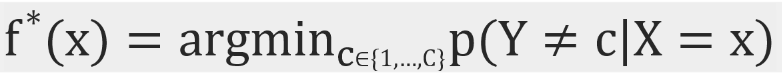


But this approach requires the model output to be a probability, then we would try to correct the analyzed error:

If the original model f is not calibrated retrieving probabilities, we can approximate f by another classifier close to what we are doing using Bayes classifier f^* by following those rules:

1) Apply Parzen window to the training data to estimate the weighted class densities.

2) Then, apply the Bayes’ rule to approximate the probability p(Y=c|X=x) for all classes

3) Get a final estimated Bayes classifier

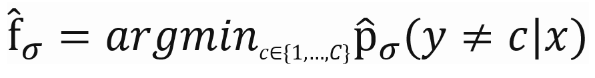

